In [334]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns',30)

In [484]:
main_dataset = pd.read_parquet('data/main_dataset.parquet')

In [485]:
main_dataset.head()

,customer_id,loan_id,ACC_CREATION_DATETIME,APPLICATION_DATETIME,LOAN_ORIGINATION_DATETIME,max_days_late,target,account_to_application_days,n_sf_apps,first_app_date,last_app_date,n_bnpl_apps,n_bnpl_approved_apps,first_bnpl_app_date,last_bnpl_app_date,n_inquiries_l3m,n_inquiries_l6m
0,1223,1,2021-08-23 13:57:56,2022-04-26 07:00:00,2022-10-20 18:26:35,5,0,245,1.0,2022-04-25,2022-04-25,1.0,0.0,2022-04-26 02:15:17.742,2022-04-26 02:15:17.742,91.0,91.0
1,5190,2,2022-04-26 09:57:25,2022-04-26 07:00:00,2022-12-22 18:03:32,2,0,0,NaN,NaT,NaT,NaN,NaN,NaT,NaT,NaN,NaN
2,5194,3,2022-04-26 12:22:35,2022-04-26 07:00:00,2022-08-09 17:31:05,4,0,0,NaN,NaT,NaT,NaN,NaN,NaT,NaT,NaN,NaN
3,3978,4,2022-03-09 11:26:55,2022-04-26 07:00:00,2022-11-11 19:48:08,2,0,47,1.0,2022-03-17,2022-03-17,2.0,0.0,2022-03-19 22:02:50.555,2022-03-09 16:41:49.675,13.0,13.0
4,4535,5,2022-04-01 14:28:42,2022-04-26 07:00:00,2022-07-24 12:07:15,2,0,24,1.0,2022-04-01,2022-04-01,1.0,0.0,2022-04-01 19:37:56.185,2022-04-01 19:37:56.185,21.0,21.0


### NA description
Let's view the percentage of NA's in each variable

In [491]:
pd.DataFrame(main_dataset.isna().sum()/main_dataset.shape[0])

,0
customer_id,0.000000
loan_id,0.000000
ACC_CREATION_DATETIME,0.000000
APPLICATION_DATETIME,0.000000
LOAN_ORIGINATION_DATETIME,0.000000
max_days_late,0.000000
target,0.000000
account_to_application_days,0.000000
n_sf_apps,0.529127
first_app_date,0.529127


It seems that the NA's are in variables where it is reasonable to have NA, for example, 'n_bnpl_apps,' as not everyone has applied to BNPL products

### Rare cases related to dates
At times, the data may include rare cases that can impact our analysis, so we need to investigate them.

In [338]:
# To dateime conversion
main_dataset[["ACC_CREATION_DATETIME", "APPLICATION_DATETIME", "LOAN_ORIGINATION_DATETIME",
              "first_app_date", "last_app_date", "first_bnpl_app_date",
              "last_bnpl_app_date"]] = \
main_dataset[["ACC_CREATION_DATETIME", "APPLICATION_DATETIME", "LOAN_ORIGINATION_DATETIME",
              "first_app_date", "last_app_date", "first_bnpl_app_date",
              "last_bnpl_app_date"]].apply(pd.to_datetime)

##### Case 1: Application date before account creation date

In [339]:
main_dataset[((main_dataset["APPLICATION_DATETIME"] - 
             main_dataset["ACC_CREATION_DATETIME"]).dt.days)<0]

,customer_id,loan_id,ACC_CREATION_DATETIME,APPLICATION_DATETIME,LOAN_ORIGINATION_DATETIME,max_days_late,target,account_to_application_days,n_sf_apps,first_app_date,last_app_date,n_bnpl_apps,n_bnpl_approved_apps,first_bnpl_app_date,last_bnpl_app_date,n_inquiries_l3m,n_inquiries_l6m
1,5190,2,2022-04-26 09:57:25,2022-04-26 07:00:00,2022-12-22 18:03:32,2,0,0,NaN,NaT,NaT,NaN,NaN,NaT,NaT,NaN,NaN
2,5194,3,2022-04-26 12:22:35,2022-04-26 07:00:00,2022-08-09 17:31:05,4,0,0,NaN,NaT,NaT,NaN,NaN,NaT,NaT,NaN,NaN
7,5430,8,2022-05-05 18:28:18,2022-05-05 07:00:00,2023-01-10 20:02:22,0,0,0,NaN,NaT,NaT,NaN,NaN,NaT,NaT,NaN,NaN
36,5420,37,2022-05-05 12:08:12,2022-05-05 07:00:00,2023-04-03 19:59:56,39,1,0,NaN,NaT,NaT,NaN,NaN,NaT,NaT,NaN,NaN
106,5435,107,2022-05-06 14:51:20,2022-05-06 07:00:00,2023-01-18 15:17:53,4,0,0,NaN,NaT,NaT,NaN,NaN,NaT,NaT,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14447,14450,14448,2023-05-12 14:39:39,2023-05-12 07:00:00,2023-05-15 21:06:23,1,0,0,1.0,2023-05-12,2023-05-12,NaN,NaN,NaT,NaT,NaN,NaN
14448,14451,14449,2023-05-14 17:55:41,2023-05-14 07:00:00,2023-05-19 21:06:14,-1,0,0,NaN,NaT,NaT,NaN,NaN,NaT,NaT,NaN,NaN
14449,14452,14450,2023-05-15 12:02:51,2023-05-15 07:00:00,2023-05-21 14:56:30,5,0,0,NaN,NaT,NaT,NaN,NaN,NaT,NaT,NaN,NaN
14450,14453,14451,2023-05-16 12:54:39,2023-05-16 07:00:00,2023-05-19 21:07:56,0,0,0,NaN,NaT,NaT,NaN,NaN,NaT,NaT,NaN,NaN


In [340]:
main_dataset[((main_dataset["APPLICATION_DATETIME"] - 
    main_dataset["ACC_CREATION_DATETIME"]).dt.days)<0]['account_to_application_days'].describe()

count    3603.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: account_to_application_days, dtype: float64

These customers are new and the difference is in hours and doesn't exceed days, we can retain those customers. It's a round hours problem

##### Case 2: Loan origination date before application date

In [341]:
main_dataset[((main_dataset["LOAN_ORIGINATION_DATETIME"] - 
             main_dataset["APPLICATION_DATETIME"]).dt.days)<0]

,customer_id,loan_id,ACC_CREATION_DATETIME,APPLICATION_DATETIME,LOAN_ORIGINATION_DATETIME,max_days_late,target,account_to_application_days,n_sf_apps,first_app_date,last_app_date,n_bnpl_apps,n_bnpl_approved_apps,first_bnpl_app_date,last_bnpl_app_date,n_inquiries_l3m,n_inquiries_l6m
14202,7002,14203,2022-07-11 18:42:38,2023-04-19 07:00:00,2023-04-19 04:06:12,9,0,281,1.0,2022-07-11,2022-07-11,1.0,0.0,2022-07-11 23:50:17.080,2022-07-11 23:50:17.080,0.0,0.0
14205,538,14206,2021-05-31 19:32:44,2023-04-19 07:00:00,2023-04-19 06:42:15,1,0,687,NaN,NaT,NaT,NaN,NaN,NaT,NaT,NaN,NaN


It seems a round hour problem too in aplication datetime

##### Case 3: Loan origination date before account creation date

In [342]:
main_dataset[((main_dataset["LOAN_ORIGINATION_DATETIME"] - 
             main_dataset["ACC_CREATION_DATETIME"]).dt.days)<0]

,customer_id,loan_id,ACC_CREATION_DATETIME,APPLICATION_DATETIME,LOAN_ORIGINATION_DATETIME,max_days_late,target,account_to_application_days,n_sf_apps,first_app_date,last_app_date,n_bnpl_apps,n_bnpl_approved_apps,first_bnpl_app_date,last_bnpl_app_date,n_inquiries_l3m,n_inquiries_l6m
10403,12775,10404,2023-01-29 13:45:35,2023-01-29 08:00:00,2023-01-29 08:35:00,43,1,0,NaN,NaT,NaT,NaN,NaN,NaT,NaT,NaN,NaN
14153,14370,14154,2023-04-18 19:14:30,2023-04-18 07:00:00,2023-04-18 13:40:56,14,0,0,NaN,NaT,NaT,NaN,NaN,NaT,NaT,NaN,NaN
14154,14371,14155,2023-04-18 21:45:30,2023-04-18 07:00:00,2023-04-18 17:20:58,0,0,0,1.0,2023-04-18,2023-04-18,NaN,NaN,NaT,NaT,NaN,NaN
14185,14380,14186,2023-04-19 14:45:45,2023-04-19 07:00:00,2023-04-19 09:30:04,19,0,0,NaN,NaT,NaT,NaN,NaN,NaT,NaT,NaN,NaN


As the hours appear to be within an acceptable range, we will exclude these four cases

In [343]:
main_dataset.shape

(14454, 17)

In [344]:
main_dataset = main_dataset[~(((main_dataset["LOAN_ORIGINATION_DATETIME"] - 
             main_dataset["ACC_CREATION_DATETIME"]).dt.days)<0)]

##### Sanity check: All application dates must be before application datetime

In [345]:
main_dataset[((main_dataset["APPLICATION_DATETIME"] - 
             main_dataset["first_app_date"]).dt.days)<0]

,customer_id,loan_id,ACC_CREATION_DATETIME,APPLICATION_DATETIME,LOAN_ORIGINATION_DATETIME,max_days_late,target,account_to_application_days,n_sf_apps,first_app_date,last_app_date,n_bnpl_apps,n_bnpl_approved_apps,first_bnpl_app_date,last_bnpl_app_date,n_inquiries_l3m,n_inquiries_l6m


In [346]:
main_dataset[((main_dataset["APPLICATION_DATETIME"] - 
             main_dataset["last_app_date"]).dt.days)<0]

,customer_id,loan_id,ACC_CREATION_DATETIME,APPLICATION_DATETIME,LOAN_ORIGINATION_DATETIME,max_days_late,target,account_to_application_days,n_sf_apps,first_app_date,last_app_date,n_bnpl_apps,n_bnpl_approved_apps,first_bnpl_app_date,last_bnpl_app_date,n_inquiries_l3m,n_inquiries_l6m


In [347]:
main_dataset[((main_dataset["APPLICATION_DATETIME"] - 
             main_dataset["first_bnpl_app_date"]).dt.days)<0]

,customer_id,loan_id,ACC_CREATION_DATETIME,APPLICATION_DATETIME,LOAN_ORIGINATION_DATETIME,max_days_late,target,account_to_application_days,n_sf_apps,first_app_date,last_app_date,n_bnpl_apps,n_bnpl_approved_apps,first_bnpl_app_date,last_bnpl_app_date,n_inquiries_l3m,n_inquiries_l6m


In [348]:
main_dataset[((main_dataset["APPLICATION_DATETIME"] - 
             main_dataset["last_bnpl_app_date"]).dt.days)<0]

,customer_id,loan_id,ACC_CREATION_DATETIME,APPLICATION_DATETIME,LOAN_ORIGINATION_DATETIME,max_days_late,target,account_to_application_days,n_sf_apps,first_app_date,last_app_date,n_bnpl_apps,n_bnpl_approved_apps,first_bnpl_app_date,last_bnpl_app_date,n_inquiries_l3m,n_inquiries_l6m


There isn't problem

### New features
Create new features based on data features

In [349]:
# Days from last application date to application
main_dataset.loc[:,['antiquity_account']] = \
    (main_dataset['APPLICATION_DATETIME'] - main_dataset['ACC_CREATION_DATETIME']).dt.days

In [350]:
main_dataset['antiquity_account'].min()

-1

The cases with 'antiquity_account' equal to -1 are the ones we previously analyzed, so we can retain them and replace -1 with 0

In [351]:
main_dataset['antiquity_account'] = np.where(
    main_dataset['antiquity_account']<0, 0, main_dataset['antiquity_account'])

In [352]:
# Days from last application date to application
main_dataset.loc[:,['last_app_date_to_application_days']] = \
    (main_dataset['APPLICATION_DATETIME'] - main_dataset['last_app_date']).dt.days

In [353]:
# Days from first application date to application
main_dataset.loc[:,['first_app_date_to_application_days']] = \
    (main_dataset['APPLICATION_DATETIME'] - main_dataset['first_app_date']).dt.days

In [354]:
# Days from last bnpl application date to application
main_dataset.loc[:,['last_bnpl_app_date_to_application_days']] = \
    (main_dataset['APPLICATION_DATETIME'] - main_dataset['last_bnpl_app_date']).dt.days

In [355]:
# Days from first bnpl application date to application
main_dataset.loc[:,['first_bnpl_app_date_to_application_days']] = \
    (main_dataset['APPLICATION_DATETIME'] - main_dataset['first_bnpl_app_date']).dt.days

In [356]:
# Days from first application date to last application
main_dataset.loc[:,['first_app_date_to_last_app_date_days']] = \
    (main_dataset['last_app_date'] - main_dataset['first_app_date']).dt.days

In [357]:
# Days from first bnpl application date to last bnpl application
main_dataset.loc[:,['first_bnpl_app_date_to_last_bnpl_app_date_days']] = \
    (main_dataset['last_bnpl_app_date'] - main_dataset['first_bnpl_app_date']).dt.days

##### Sanity check: first_app_date_to_last_app_date_days and first_bnpl_app_date_to_last_bnpl_app_date_days need to be equeal or greater than 0, otherwise there is something rare

In [358]:
main_dataset[main_dataset['first_bnpl_app_date_to_last_bnpl_app_date_days']<0].shape

(1060, 24)

In [359]:
main_dataset[main_dataset['first_app_date_to_last_app_date_days']<0].shape

(821, 24)

Discart these cases

In [360]:
print(main_dataset.shape)

(14450, 24)


In [361]:
main_dataset = main_dataset[(main_dataset['first_bnpl_app_date_to_last_bnpl_app_date_days']>=0)|
                           (main_dataset['first_bnpl_app_date_to_last_bnpl_app_date_days'].isna())]

main_dataset = main_dataset[(main_dataset['first_app_date_to_last_app_date_days']>=0)|
                           (main_dataset['first_app_date_to_last_app_date_days'].isna())]

In [362]:
print(main_dataset.shape)

(12817, 24)


### Good vs bad customers
See the variables distribution between good and bad customers

In [363]:
main_dataset['target'].value_counts()/main_dataset.shape[0]

0    0.81665
1    0.18335
Name: target, dtype: float64

In [364]:
main_dataset.groupby('target')[[
    "max_days_late", "account_to_application_days", "n_sf_apps",
    "n_bnpl_apps", "n_bnpl_approved_apps", "n_inquiries_l3m",
    "n_inquiries_l6m",'last_app_date_to_application_days',
    'first_app_date_to_application_days','last_bnpl_app_date_to_application_days',
    'first_bnpl_app_date_to_application_days',
    'first_app_date_to_last_app_date_days',
     'first_bnpl_app_date_to_last_bnpl_app_date_days','antiquity_account'
    ]].mean()

,max_days_late,account_to_application_days,n_sf_apps,n_bnpl_apps,n_bnpl_approved_apps,n_inquiries_l3m,n_inquiries_l6m,last_app_date_to_application_days,first_app_date_to_application_days,last_bnpl_app_date_to_application_days,first_bnpl_app_date_to_application_days,first_app_date_to_last_app_date_days,first_bnpl_app_date_to_last_bnpl_app_date_days,antiquity_account
target,,,,,,,,,,,,,,
0,4.670297,144.446928,1.325256,1.0,0.217192,11.611510,18.334692,149.560112,166.071295,111.121906,111.121906,16.511184,0.0,144.446928
1,55.961277,120.661277,1.352601,1.0,0.128705,13.144526,22.548905,148.078035,166.162813,111.176287,111.176287,18.084778,0.0,120.661277


Bad customers tend to apply more frequently for smartphone financing and BNPL products, but they are approved less often than good customers. Additionally, they receive more inquiries from external entities.

In [365]:
main_dataset.groupby('target')[[
    "max_days_late", "account_to_application_days", "n_sf_apps",
    "n_bnpl_apps", "n_bnpl_approved_apps", "n_inquiries_l3m",
    "n_inquiries_l6m",'last_app_date_to_application_days',
    'first_app_date_to_application_days','last_bnpl_app_date_to_application_days',
    'first_bnpl_app_date_to_application_days',
    'first_app_date_to_last_app_date_days',
     'first_bnpl_app_date_to_last_bnpl_app_date_days','antiquity_account'
    ]].min()

,max_days_late,account_to_application_days,n_sf_apps,n_bnpl_apps,n_bnpl_approved_apps,n_inquiries_l3m,n_inquiries_l6m,last_app_date_to_application_days,first_app_date_to_application_days,last_bnpl_app_date_to_application_days,first_bnpl_app_date_to_application_days,first_app_date_to_last_app_date_days,first_bnpl_app_date_to_last_bnpl_app_date_days,antiquity_account
target,,,,,,,,,,,,,,
0,-7,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,34,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


See how many cases there are with max_days_late less than 0 and quit them

In [366]:
main_dataset[main_dataset["max_days_late"]<0].shape

(376, 24)

In [367]:
main_dataset = main_dataset[main_dataset["max_days_late"]>=0]

In [368]:
main_dataset.groupby('target')[[
    "max_days_late", "account_to_application_days", "n_sf_apps",
    "n_bnpl_apps", "n_bnpl_approved_apps", "n_inquiries_l3m",
    "n_inquiries_l6m",'last_app_date_to_application_days',
    'first_app_date_to_application_days','last_bnpl_app_date_to_application_days',
    'first_bnpl_app_date_to_application_days',
    'first_app_date_to_last_app_date_days',
     'first_bnpl_app_date_to_last_bnpl_app_date_days','antiquity_account'
    ]].max()

,max_days_late,account_to_application_days,n_sf_apps,n_bnpl_apps,n_bnpl_approved_apps,n_inquiries_l3m,n_inquiries_l6m,last_app_date_to_application_days,first_app_date_to_application_days,last_bnpl_app_date_to_application_days,first_bnpl_app_date_to_application_days,first_app_date_to_last_app_date_days,first_bnpl_app_date_to_last_bnpl_app_date_days,antiquity_account
target,,,,,,,,,,,,,,
0,33,901,36.0,1.0,1.0,170.0,213.0,689.0,693.0,446.0,446.0,521.0,0.0,901
1,70,818,12.0,1.0,1.0,158.0,159.0,629.0,631.0,441.0,441.0,475.0,0.0,818


### Distribution plots
Plot some distribution plots that describe the distribution between good and bad customers

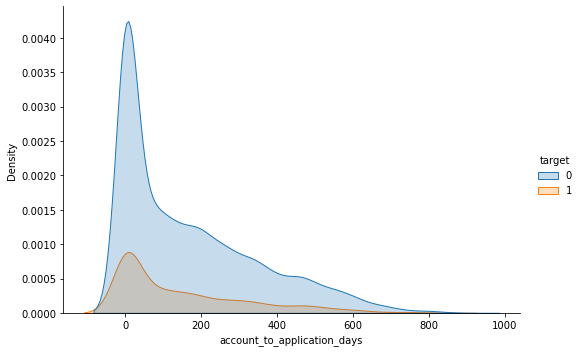

In [490]:
sns.displot(data=main_dataset, x='account_to_application_days', hue='target',
            kind='kde', fill=True, height=5, aspect=1.5)
plt.savefig('img/n_bnpl_apps.png', bbox_inches = "tight")
plt.show()

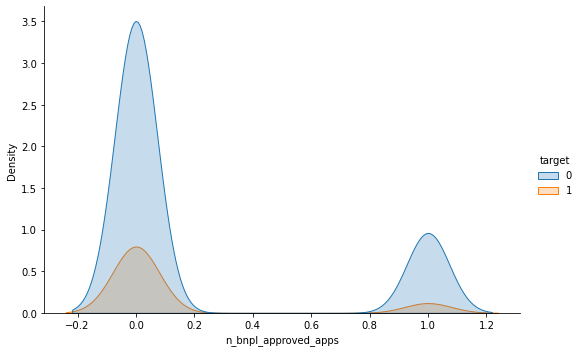

In [483]:
sns.displot(data=main_dataset, x='n_bnpl_approved_apps', hue='target', kind='kde',
            fill=True, height=5, aspect=1.5)
plt.savefig('img/n_bnpl_approved_apps.png', bbox_inches = "tight")
plt.show()

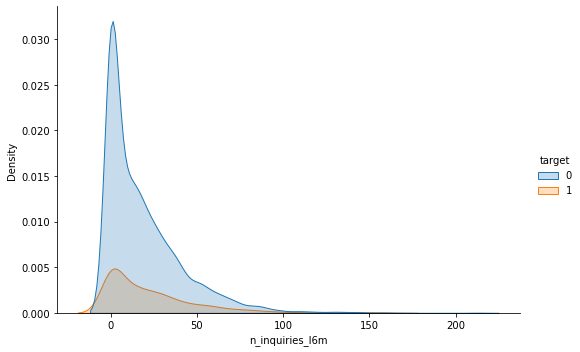

In [371]:
sns.displot(data=main_dataset, x='n_inquiries_l6m', hue='target', kind='kde',
            fill=True, height=5, aspect=1.5)
plt.show()

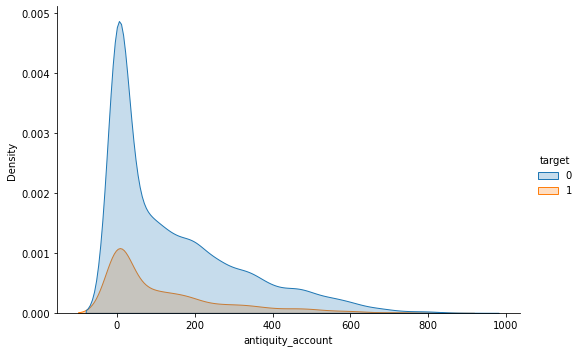

In [372]:
sns.displot(data=main_dataset, x='antiquity_account', hue='target',
            kind='kde', fill=True, height=5, aspect=1.5)
plt.show()

### Vintage
I will supose the following: 
- APPLICATION_DATETIME: Date in which the customer applied to a loan. Here we decide if we reject or approve the loan.
- 'LOAN_ORIGINATION_DATETIME': Date in which the loan was disbursed. In this date we start tracking the payments. So I use this date to create the vintage. 

In [376]:
main_dataset['vintage'] = \
    main_dataset['LOAN_ORIGINATION_DATETIME'].dt.year.astype(str) + '-' \
    + main_dataset['LOAN_ORIGINATION_DATETIME'].dt.month.astype(str)
    

In [384]:
vintage_order = [
    '2022-7','2022-8','2022-9','2022-10','2022-11',
    '2022-12','2023-1','2023-2','2023-3', '2023-4', '2023-5'
    ]

In [391]:
vintage = pd.DataFrame(main_dataset['vintage'].value_counts()).loc[vintage_order,:]
vintage = vintage.reset_index()

In [393]:
vintage.columns = ['vintage', 'total']

In [394]:
vintage

,vintage,total
0,2022-7,708
1,2022-8,930
2,2022-9,760
3,2022-10,831
4,2022-11,1083
5,2022-12,1379
6,2023-1,1648
7,2023-2,1741
8,2023-3,1779
9,2023-4,1515


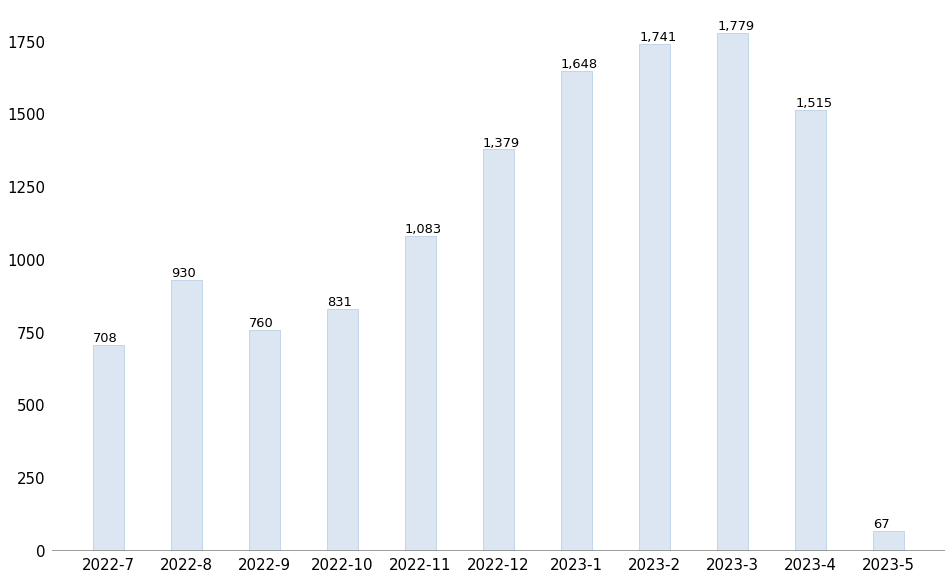

In [438]:
plt.figure(figsize=(16,10))
barWidth1 = 0.8
plt.bar(
    vintage['vintage'],vintage['total'], color='#dce6f2',
    width=barWidth1/2, edgecolor='#c3d5e8', label='Target'
    )
for i, bar in enumerate(vintage['total'].values):
    plt.text(i-0.2 , bar+10, '{:,}'.format(bar), fontsize=13)
plt.xticks(fontsize=13)
plt.tick_params(
    bottom=False,
    left=False,
    labelsize=15
)
plt.axhline(y=0, color='gray')
plt.box(False)
plt.savefig('img/vintage_universe.png', bbox_inches = "tight")


In [478]:
main_dataset.shape

(12441, 25)

###### Check if duplicates

In [479]:
len(main_dataset['customer_id'].unique())

12441

In [481]:
main_dataset.to_csv('data/main_dataset_preprocessed.csv', index=False)

## Credit reports

In [440]:
credit_reports = pd.read_parquet('data/credit_reports.parquet')

In [447]:
credit_reports.head()

,customer_id,INQUIRY_TIME,CDC_INQUIRY_ID,INQUIRY_DATE,PREVENTION_KEY,CURRENCY,MAX_CREDIT,CREDIT_LIMIT,PAYMENT_AMOUNT,UPDATE_DATE,LOAN_OPENING_DATE,LOAN_CLOSING_DATE,WORST_DELAY_DATE,REPORT_DATE,LAST_PURCHASE_DATE,LAST_PAYMENT_DATE,PAYMENT_FREQUENCY,BUSINESS_TYPE,CREDIT_TYPE,ACCOUNT_TYPE,RESPONSABILITY_TYPE,TOTAL_PAYMENTS,DELAYED_PAYMENTS,CURRENT_PAYMENT,WORST_DELAY,TOTAL_REPORTED_PAYMENTS,CURRENT_BALANCE,BALANCE_DUE,BALANCE_DUE_WORST_DELAY
0,4223,2022-04-01 00:32:36.689000+00:00,710278-27993a6e-2885-48d4-a753-9249e7022af1,2022-04-01,SIN OBSERVACION,PESOS MEXICANOS,1244.0,9900.0,1244.0,2022-02-28,2019-08-30,NaT,2022-01-31,2022-02-28,2019-08-30,2020-08-18,MENSUAL,TIENDA DEPARTAMENTAL,APARATOS/MUEBLES,PAGOS FIJOS,INDIVIDUAL (TITULAR),12.0,7,13,13.0,0,1244.0,1244.0,1244.0
1,4223,2022-04-01 00:32:36.689000+00:00,710278-27993a6e-2885-48d4-a753-9249e7022af1,2022-04-01,SIN OBSERVACION,PESOS MEXICANOS,1722.0,9900.0,1722.0,2022-02-28,2020-04-21,NaT,2021-12-31,2022-02-28,2020-04-21,2020-08-18,PAGO MINIMO PARA CUENTAS REVOLVENTES,TIENDA DEPARTAMENTAL,LINEA DE CREDITO,REVOLVENTE,INDIVIDUAL (TITULAR),0.0,3,13,13.0,0,1722.0,1722.0,1722.0
2,4223,2022-04-01 00:32:36.689000+00:00,710278-27993a6e-2885-48d4-a753-9249e7022af1,2022-04-01,SIN OBSERVACION,PESOS MEXICANOS,6346.0,0.0,482.0,2022-03-28,2021-12-17,NaT,NaT,2022-03-28,2021-12-17,2022-03-26,SEMANAL,BANCOS,PRESTAMO PERSONAL,PAGOS FIJOS,INDIVIDUAL (TITULAR),16.0,0,V,0.0,0,943.0,0.0,0.0
3,3490,2022-02-15 02:30:22.086000+00:00,622857-6b4e9d95-7491-40c3-bccd-442de7f94c58,2022-02-15,SIN OBSERVACION,PESOS MEXICANOS,11600.0,0.0,232.0,2022-02-01,2021-03-02,NaT,2022-01-04,2022-02-01,2021-03-02,2022-01-25,SEMANAL,TIENDA DE ROPA,PRESTAMO PERSONAL,PAGOS FIJOS,INDIVIDUAL (TITULAR),100.0,4,01,1.0,0,6185.0,116.0,116.0
4,6486,2022-06-25 01:57:14.868000+00:00,875073-46a5f149-19db-4193-b92a-b8f41fb3e896,2022-06-25,SIN OBSERVACION,PESOS MEXICANOS,2452.0,16800.0,2452.0,2021-09-30,2019-02-22,NaT,2020-08-31,2021-09-30,2019-04-16,2019-06-12,PAGO MINIMO PARA CUENTAS REVOLVENTES,TIENDA DEPARTAMENTAL,LINEA DE CREDITO,REVOLVENTE,INDIVIDUAL (TITULAR),0.0,19,13,13.0,0,2452.0,2452.0,2452.0


In [450]:
numerical_features = [
    'MAX_CREDIT', 'CREDIT_LIMIT', 'PAYMENT_AMOUNT', 'TOTAL_PAYMENTS',
    'DELAYED_PAYMENTS', 'CURRENT_PAYMENT', 'WORST_DELAY', 'TOTAL_REPORTED_PAYMENTS',
    'CURRENT_BALANCE', 'BALANCE_DUE', 'BALANCE_DUE_WORST_DELAY'
    ]
categorical_features = [
    'PREVENTION_KEY', 'CURRENCY', 'PAYMENT_FREQUENCY', 'BUSINESS_TYPE',
    'CREDIT_TYPE', 'ACCOUNT_TYPE', 'RESPONSABILITY_TYPE'
    ]
datetime_features = [
    'INQUIRY_TIME', 'INQUIRY_DATE', 'UPDATE_DATE', 'LOAN_OPENING_DATE', 
    'LOAN_CLOSING_DATE', 'WORST_DELAY_DATE', 'REPORT_DATE',
    'LAST_PURCHASE_DATE', 'LAST_PAYMENT_DATE'
    ]

In [458]:
credit_reports.isna().sum()/credit_reports.shape[0]

customer_id                0.000000
INQUIRY_TIME               0.000000
CDC_INQUIRY_ID             0.000310
INQUIRY_DATE               0.000310
PREVENTION_KEY             0.000310
CURRENCY                   0.000310
MAX_CREDIT                 0.000633
CREDIT_LIMIT               0.029082
PAYMENT_AMOUNT             0.000310
UPDATE_DATE                0.000310
LOAN_OPENING_DATE          0.000310
LOAN_CLOSING_DATE          0.329720
WORST_DELAY_DATE           0.705390
REPORT_DATE                0.000310
LAST_PURCHASE_DATE         0.014414
LAST_PAYMENT_DATE          0.110236
PAYMENT_FREQUENCY          0.000310
BUSINESS_TYPE              0.000310
CREDIT_TYPE                0.000310
ACCOUNT_TYPE               0.000310
RESPONSABILITY_TYPE        0.000310
TOTAL_PAYMENTS             0.064885
DELAYED_PAYMENTS           0.000310
CURRENT_PAYMENT            0.000310
WORST_DELAY                0.011171
TOTAL_REPORTED_PAYMENTS    0.145955
CURRENT_BALANCE            0.000310
BALANCE_DUE                0

In [459]:
credit_reports[numerical_features].dtypes

MAX_CREDIT                 float64
CREDIT_LIMIT               float64
PAYMENT_AMOUNT             float64
TOTAL_PAYMENTS             float64
DELAYED_PAYMENTS            object
CURRENT_PAYMENT             object
WORST_DELAY                float64
TOTAL_REPORTED_PAYMENTS     object
CURRENT_BALANCE            float64
BALANCE_DUE                float64
BALANCE_DUE_WORST_DELAY    float64
dtype: object

In [466]:
credit_reports['DELAYED_PAYMENTS'].value_counts()

0     204496
1      11464
2       6834
24      6208
3       5125
       ...  
90        26
92        24
96        24
94        19
95        13
Name: DELAYED_PAYMENTS, Length: 97, dtype: int64

In [467]:
credit_reports['CURRENT_PAYMENT'].value_counts()

V     223486
13     16752
01      9244
06      4498
02      3733
       ...  
82        23
79        20
74        18
78        17
77        13
Name: CURRENT_PAYMENT, Length: 86, dtype: int64

In [468]:
credit_reports['TOTAL_REPORTED_PAYMENTS'].value_counts()

0    245415
Name: TOTAL_REPORTED_PAYMENTS, dtype: int64

I will discart TOTAL_REPORTED_PAYMENTS as all values are 0 and
replace V with -1 in CURRENT_PAYMENT and -- with -2

In [469]:
credit_reports['CURRENT_PAYMENT'] = np.where(
    credit_reports['CURRENT_PAYMENT']=='V',-1,credit_reports['CURRENT_PAYMENT'])

In [472]:
credit_reports['CURRENT_PAYMENT'] = np.where(
    credit_reports['CURRENT_PAYMENT']=='--',-2,credit_reports['CURRENT_PAYMENT'])

In [473]:
credit_reports[['DELAYED_PAYMENTS', 'CURRENT_PAYMENT']] = \
    credit_reports[['DELAYED_PAYMENTS', 'CURRENT_PAYMENT']].apply(pd.to_numeric)

In [474]:
credit_reports[numerical_features].describe().round()

,MAX_CREDIT,CREDIT_LIMIT,PAYMENT_AMOUNT,TOTAL_PAYMENTS,DELAYED_PAYMENTS,CURRENT_PAYMENT,WORST_DELAY,CURRENT_BALANCE,BALANCE_DUE,BALANCE_DUE_WORST_DELAY
count,287174.0,278999.0,287267.0,268711.0,287267.0,287267.0,284146.0,287267.0,287267.0,287267.0
mean,15280.0,5526.0,1671.0,23.0,4.0,3.0,4.0,4578.0,2090.0,1671.0
std,1313088.0,27883.0,13010.0,89.0,10.0,12.0,12.0,35543.0,14112.0,11646.0
min,0.0,0.0,0.0,0.0,0.0,-2.0,0.0,0.0,0.0,0.0
25%,548.0,0.0,0.0,1.0,0.0,-1.0,0.0,0.0,0.0,0.0
50%,2300.0,400.0,0.0,3.0,0.0,-1.0,0.0,0.0,0.0,0.0
75%,7483.0,3000.0,149.0,16.0,1.0,-1.0,2.0,273.0,0.0,159.0
max,404040416.0,1900000.0,1800000.0,1800.0,96.0,84.0,84.0,3469743.0,1800000.0,1800000.0


In [476]:
for categrical_feature in categorical_features:
    print('*'*10, categrical_feature)
    print(credit_reports[categrical_feature].value_counts()/credit_reports.shape[0])
    print('-'*100)

********** PREVENTION_KEY
SIN OBSERVACION                                                                      0.677404
CUENTA CANCELADA O CERRADA                                                           0.208428
CUENTA QUE CAUSA QUEBRANTO                                                           0.041969
CUENTA EN COBRANZA                                                                   0.028533
CUENTA CERRADA QUE ESTUVO EN COBRANZA Y FUE PAGADA SIN CAUSAR QUEBRANTO              0.013276
CUENTA QUE NO ESTA AL CORRIENTE VENDIDA O CEDIDA A UN USUARIO DE UNA SOCIEDAD        0.011091
CUENTA INACTIVA                                                                      0.006027
CUENTA REESTRUCTURADA SIN PAGO MENOR POR MODIFICACION DE LA SITUACION DEL CLIENTE    0.002046
CONVENIO DE FINIQUITO O PAGO MENOR                                                   0.001656
EN LOCALIZACION                                                                      0.001535
TARJETA DE CREDITO EXTRAVIADA O RO

- As we can see, there are numerous features to utilize for feeding our model. Therefore, I will conduct feature engineering in a separate notebook, as it is a crucial task.

In [454]:
credit_reports[datetime_features].min()

INQUIRY_TIME          2021-04-29 22:50:03.745000+00:00
INQUIRY_DATE                       2021-04-29 00:00:00
UPDATE_DATE                        2001-04-25 00:00:00
LOAN_OPENING_DATE                  1950-01-01 00:00:00
LOAN_CLOSING_DATE                  2000-08-28 00:00:00
WORST_DELAY_DATE                   1998-10-10 00:00:00
REPORT_DATE                        2001-04-25 00:00:00
LAST_PURCHASE_DATE                 1950-01-01 00:00:00
LAST_PAYMENT_DATE                  1950-01-01 00:00:00
dtype: object

- There are so old loans

In [456]:
credit_reports[datetime_features].max()

INQUIRY_TIME          2023-05-17 15:20:36.890000+00:00
INQUIRY_DATE                       2023-05-17 00:00:00
UPDATE_DATE                        2023-05-07 00:00:00
LOAN_OPENING_DATE                  2023-03-31 00:00:00
LOAN_CLOSING_DATE                  2023-03-31 00:00:00
WORST_DELAY_DATE                   2023-04-12 00:00:00
REPORT_DATE                        2023-05-07 00:00:00
LAST_PURCHASE_DATE                 2023-04-07 00:00:00
LAST_PAYMENT_DATE                  2023-05-07 00:00:00
dtype: object